## **Challenge Telecom X Latam**

Una empresa desea identificar porque pierde clientes, se realizará un análisis para ayudar al equipo a determinar posibles razones.

#📌 Extracción

El primer paso es cargar e imprimir la base de datos (se hace desde un appi y se transforma de json

In [195]:
  import requests
import json
api_url="https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(api_url)
data = json.loads(response.text)
if response.status_code == 200:
    print(data)
else:
    print("Error en la solicitud:", response.status_code)

Output hidden; open in https://colab.research.google.com to view.

#🔧 Transformación

In [196]:
import pandas as pd
datos=pd.json_normalize(data)
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [197]:
## revisar que no haya valores duplicados, ausentes, errores de formato e incosistencias.
datos.info()  #revisamos tipos de datos
#CustomerId debe ser texto, churn booleano?, gender texto, seniorCitizen (0,1), Parner Booleano?, Dependets Booleano, ternure numerico


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [198]:
churn_unique = datos['Churn'].unique()  #determinamos los valores que puede contener Churn y encontramos valores faltantes.
print(churn_unique)

['No' 'Yes' '']


In [199]:
#filas=len(datos)   # son 7267 filas originalmente, y de ellas 224 no indican valores en Churn
#filas
conteo_vacios = datos['Churn'].value_counts()['']
conteo_vacios

np.int64(224)

In [200]:
conteo_No = datos['Churn'].value_counts()['No']  #5174 usuarios se mantienen
conteo_No

np.int64(5174)

In [201]:
conteo_Yes = datos['Churn'].value_counts()['Yes'] # 1869 usuarios abandonaron
conteo_Yes

np.int64(1869)

# Comprobación de incoherencias en los datos

In [202]:
datos.drop(datos[(datos['Churn'] =='')].index, inplace=True)
filas=len(datos)   # son 7267 filas originalmente, y de ellas 224 no indican valores en Churn
filas     #comprobamos que quedan 7043 registros.

7043

In [203]:
#Revisamos inconsistencias o valores faltantes en el resto de las columnas
ID = datos['customerID'].unique()  #
print(ID)
gender = datos['customer.gender'].unique()  #
print(gender)
senior_values=datos['customer.SeniorCitizen'].unique()  #ya es tipo entero
print(senior_values)
partner = datos['customer.Partner'].unique()  #
print(partner)
dependents = datos['customer.Dependents'].unique()
print(dependents)
tenure = datos['customer.tenure'].unique()  #ya está en número entero
print(tenure)
phoneservice = datos['phone.PhoneService'].unique()  #.
print(phoneservice)
lines = datos['phone.MultipleLines'].unique()  #.
print(lines)
internetservice = datos['internet.InternetService'].unique()  #.
print(internetservice)
security = datos['internet.OnlineSecurity'].unique()  #.
print(security)
backup = datos['internet.OnlineBackup'].unique()  #.
print(backup)
deviceprotection = datos['internet.DeviceProtection'].unique()  #.
print(deviceprotection)
tech = datos['internet.TechSupport'].unique()
print(tech)
stream = datos['internet.StreamingTV'].unique()  #ya está en número entero
print(stream)
movies = datos['internet.StreamingMovies'].unique()  #.
print(movies)
contract = datos['account.Contract'].unique()  #.
print(contract)
paperless = datos['account.PaperlessBilling'].unique()  #.
print(paperless)
payment = datos['account.PaymentMethod'].unique()  #.
print(payment)
chargesmonth = datos['account.Charges.Monthly'].unique()  #Ya está en float64
print(chargesmonth)
chargestotal = datos['account.Charges.Total'].unique()  #.
print(chargestotal)


['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
['Female' 'Male']
[0 1]
['Yes' 'No']
['Yes' 'No']
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
['Yes' 'No']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['One year' 'Month-to-month' 'Two year']
['Yes' 'No']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [204]:
import numpy as np  #convertimos los tipos object en string o numéricos

In [205]:
#conteo_vacios = datos['customerID'].value_counts()['nan']  #se buscaron celdas vacías sin éxito pero si se encontraron celdas con espacios (11) que se cambian a 0
#conteo_vacios
#nulos=datos['customerID'].isnull().sum()# : Verifica valores nulos en cada columna.
#datos['customer.gender']=
datos['customer.gender'].astype(str)  #no funciona convertir object a str, ya es str

,customer.gender
0,Female
1,Male
2,Male
3,Male
4,Female
...,...
7262,Female
7263,Male
7264,Male
7265,Male


In [206]:
#intenté pasarlo a string pero no ya es str
datos['customer.gender']=datos['customer.gender'].astype(str)
datos['customer.Partner']=datos['customer.Partner'].astype(str)  #
datos['customer.Dependents']= datos['customer.Dependents'].astype(str)
datos['phone.PhoneService']= datos['phone.PhoneService'].astype(str)  #.
datos['phone.MultipleLines']= datos['phone.MultipleLines'].astype(str) #.
datos['internet.InternetService']= datos['internet.InternetService'].astype(str)  #.
datos['internet.OnlineSecurity']= datos['internet.OnlineSecurity'].astype(str)  #.
datos['internet.OnlineBackup']= datos['internet.OnlineBackup'].astype(str)  #.
datos['internet.DeviceProtection']= datos['internet.DeviceProtection'].astype(str)  #.
datos['internet.TechSupport']= datos['internet.TechSupport'].astype(str)
#datos['internet.StreamingTV'].astype(str)  #ya está en número entero
datos['internet.StreamingMovies']= datos['internet.StreamingMovies'].astype(str)  #.
datos['account.Contract']= datos['account.Contract'].astype(str)  #.
datos['account.PaperlessBilling']= datos['account.PaperlessBilling'].astype(str)  #.
datos['account.PaymentMethod']= datos['account.PaymentMethod'].astype(str)  #.
#chargesmonth = datos['account.Charges.Monthly'].unique()  #Ya está en float64


# Manejo de inconsistencias

In [207]:
conteo_vacios = datos['account.Charges.Total'].value_counts()[' ']  #se buscaron celdas vacías sin éxito pero si se encontraron celdas con espacios (11) que se cambian a 0
conteo_vacios
datos['account.Charges.Total'] = datos['account.Charges.Total'].replace(' ', '0')  #una vez realizado, podemos tratar de hacer el cambio de tipo a flotante.

In [208]:
datos['account.Charges.Total']= datos['account.Charges.Total'].astype(np.float64)  #Éxito total.

In [209]:
datos.duplicated().sum()  #no hay duplicados

np.int64(0)

In [210]:
datos.isnull().sum()  #no hay nulos

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [211]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

# Columna de cuentas diarias

In [212]:
#lo mejor que podemos hacer es dividir el cargo entre 30 porque no tenemos cada mes sino una suma mensual
datos['dailyCharge']= datos['account.Charges.Monthly']/30
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,dailyCharge
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#Estandarización y transformación de datos (opcional)

In [213]:
#Para que las gráficas estén en español cambiamos los nombres
datos['Churn']=datos['Churn'].replace('Yes','Si')
datos['customer.SeniorCitizen']=datos['customer.SeniorCitizen'].replace(0, 'No')
datos['customer.SeniorCitizen']=datos['customer.SeniorCitizen'].replace(1, 'Si')
datos['customer.gender']=datos['customer.gender'].replace('Male', 'Hombres')
datos['customer.gender']=datos['customer.gender'].replace('Female', 'Mujeres')
datos['customer.Partner']=datos['customer.Partner'].replace('Yes', 'Si')
datos['customer.Dependents']=datos['customer.Dependents'].replace('Yes', 'Si')
datos['phone.PhoneService']=datos['phone.PhoneService'].replace('Yes', 'Si')
datos['phone.MultipleLines']=datos['phone.MultipleLines'].replace('Yes', 'Si')
datos['phone.MultipleLines']=datos['phone.MultipleLines'].replace('No phone service', 'Sin telefono')
datos['internet.InternetService']=datos['internet.InternetService'].replace('Yes', 'Si')
datos['internet.InternetService']=datos['internet.InternetService'].replace('Fiber optic', 'Fibra optica')
datos['internet.OnlineSecurity']=datos['internet.OnlineSecurity'].replace('Yes', 'Si')
datos['internet.OnlineSecurity']=datos['internet.OnlineSecurity'].replace('No internet service','Sin internet')
datos['internet.OnlineBackup']=datos['internet.OnlineBackup'].replace('Yes', 'Si')
datos['internet.OnlineBackup']=datos['internet.OnlineBackup'].replace('No internet service','Sin internet')
datos['internet.DeviceProtection']=datos['internet.DeviceProtection'].replace('Yes', 'Si')
datos['internet.DeviceProtection']=datos['internet.DeviceProtection'].replace('No internet service','Sin internet')
datos['internet.TechSupport']=datos['internet.TechSupport'].replace('Yes', 'Si')
datos['internet.TechSupport']=datos['internet.TechSupport'].replace('No internet service','Sin internet')
datos['internet.StreamingTV']=datos['internet.StreamingTV'].replace('Yes', 'Si')
datos['internet.StreamingTV']=datos['internet.StreamingTV'].replace('No internet service','Sin internet')
datos['internet.StreamingMovies']=datos['internet.StreamingMovies'].replace('Yes', 'Si')
datos['internet.StreamingMovies']=datos['internet.StreamingMovies'].replace('No internet service','Sin internet')
datos['account.Contract']=datos['account.Contract'].replace('Month-to-month', 'Mensual')
datos['account.Contract']=datos['account.Contract'].replace('One year', 'Anual')
datos['account.Contract']=datos['account.Contract'].replace('Two year', 'Bianual')
datos['account.PaperlessBilling']=datos['account.PaperlessBilling'].replace('Yes', 'Si')
datos['account.PaymentMethod']=datos['account.PaymentMethod'].replace('Electronic check', 'Cheque electronico')
datos['account.PaymentMethod']=datos['account.PaymentMethod'].replace('Mailed check', 'Cheque impreso')
datos['account.PaymentMethod']=datos['account.PaymentMethod'].replace('Bank transfer (automatic)', 'Transferencia bancaria(automatico)')
datos['account.PaymentMethod']=datos['account.PaymentMethod'].replace('Credit card (automatic)', 'Tarjeta de credito(automatico)')

In [281]:
#Ahora renombramos las columnas para que estén en español y sean descriptivas
datos = datos.rename(columns={'customer.gender': 'genero',
                              'customer.SeniorCitizen': 'Tercera_edad',
                              'customer.Partner': 'casado',
                              'customer.Dependents': 'Dependientes',
                              'customer.tenure': 'meses_de_contrato',
                              'phone.PhoneService': 'servicio_telefonico',
                              'phone.MultipleLines': 'multiples_lineas_telefonicas',
                              'internet.InternetService': 'servicio_de_internet',
                              'internet.OnlineSecurity': 'seguridad_online',
                              'internet.OnlineBackup': 'respaldo_online',
                              'internet.DeviceProtection': 'Proteccion_de_dispositivo',
                              'internet.TechSupport': 'Soporte_tecnico_rapido',
                              'internet.StreamingTV': 'Streaming_TV',
                              'internet.StreamingMovies': 'Streaming_Peliculas',
                              'account.Contract': 'Tipo_de_contrato',
                              'account.PaperlessBilling': 'Factura_electronica',
                              'account.PaymentMethod': 'Metodo_de_pago',
                              'account.Charges.Monthly': 'Cargos_mensuales',
                              'account.Charges.Total': 'Cargos_totales',
                              'dailyCharge': 'cargos_diarios'})

In [215]:
datos.head()

,customerID,Churn,genero,Tercera_edad,casado,Dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_de_internet,...,Proteccion_de_dispositivo,Soporte_tecnico_rapido,Streaming_TV,Streaming_Peliculas,Tipo_de_contrato,Factura_electronica,Metodo_de_pago,Cargos_mensuales,Cargos_totales,dailyCharge
0,0002-ORFBO,No,Mujeres,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Anual,Si,Cheque impreso,65.6,593.30,2.186667
1,0003-MKNFE,No,Hombres,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mensual,No,Cheque impreso,59.9,542.40,1.996667
2,0004-TLHLJ,Si,Hombres,No,No,No,4,Si,No,Fibra optica,...,Si,No,No,No,Mensual,Si,Cheque electronico,73.9,280.85,2.463333
3,0011-IGKFF,Si,Hombres,Si,Si,No,13,Si,No,Fibra optica,...,Si,No,Si,Si,Mensual,Si,Cheque electronico,98.0,1237.85,3.266667
4,0013-EXCHZ,Si,Mujeres,Si,Si,No,3,Si,No,Fibra optica,...,No,Si,Si,No,Mensual,Si,Cheque impreso,83.9,267.40,2.796667


In [216]:
#datos['customer.Partner']=datos['customer.Partner'].replace('Yes', 1)  #trasnforma los Yes y No por 0 y 1
#datos['customer.Partner']=datos['customer.Partner'].replace('No', 0)
#datos['customer.Partner']

In [217]:
# Lo voy a usar má adelante al manipular los datos
#datos['customer.Dependents']=datos['customer.Dependents'].replace('Yes', 1)  #trasnforma los Yes y No por 0 y 1
#datos['customer.Dependents']=datos['customer.Dependents'].replace('No', 0)
#datos['phone.PhoneService']=datos['phone.PhoneService'].replace('Yes', 1)
#datos['phone.PhoneService']=datos['phone.PhoneService'].replace('No', 0)
#datos['phone.MultipleLines']=datos['phone.MultipleLines'].replace('Yes', 1)
#datos['phone.MultipleLines']=datos['phone.MultipleLines'].replace('No', 0)
#datos['internet.DeviceProtection']=datos['internet.DeviceProtection'].replace('Yes', 1)
#datos['internet.DeviceProtection']=datos['internet.DeviceProtection'].replace('No', 0)
#datos['internet.TechSupport']=datos['internet.TechSupport'].replace('Yes', 1)
#datos['internet.TechSupport']=datos['internet.TechSupport'].replace('No', 0)
#datos['internet.StreamingTV']=datos['internet.StreamingTV'].replace('Yes', 1)
#datos['internet.StreamingTV']=datos['internet.StreamingTV'].replace('No', 0)
#datos['internet.StreamingMovies']=datos['internet.StreamingMovies'].replace('Yes', 1)
#datos['internet.StreamingMovies']=datos['internet.StreamingMovies'].replace('No', 0)
#datos['account.PaperlessBilling']=datos['account.PaperlessBilling'].replace('Yes', 1)
#datos['account.PaperlessBilling']=datos['account.PaperlessBilling'].replace('No', 0)

In [218]:
#datos.head()

#📊 Carga y análisis

#Análisis Descriptivo

In [219]:
##Carga y análisis
datos.describe()  #estadísticas básicas

,meses_de_contrato,Cargos_mensuales,Cargos_totales,dailyCharge
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158723
std,24.559481,30.090047,2266.794470,1.003002
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.500000,398.550000,1.183333
50%,29.000000,70.350000,1394.550000,2.345000
75%,55.000000,89.850000,3786.600000,2.995000
max,72.000000,118.750000,8684.800000,3.958333


In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

In [221]:
type(datos)

pandas.core.frame.DataFrame

In [222]:
conteo_No = datos['Churn'].value_counts()['No']  #5174 usuarios se mantienen
conteo_No
conteo_Yes = datos['Churn'].value_counts()['Si']
conteo_Yes

np.int64(1869)

#Distribución de evasión

/tmp/ipython-input-223-3036229531.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos, x='Churn', palette=["#038597",'#dc7633'])


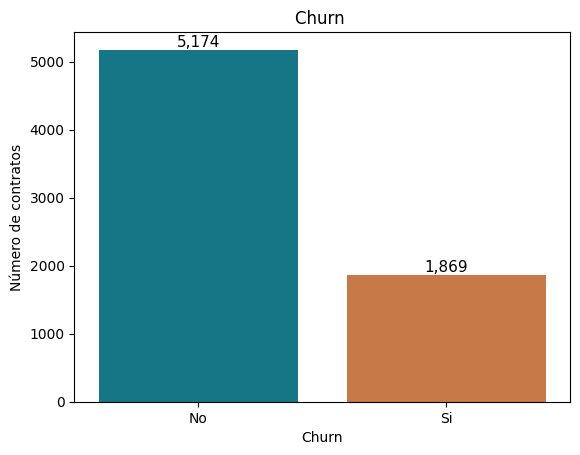

In [223]:
sns.countplot(data=datos, x='Churn', palette=["#038597",'#dc7633'])
for i, valor in enumerate(datos.Churn.value_counts()):
    plt.text(i, valor+.01 , f"{valor:,}", ha='center', va='bottom', fontsize=11) #dejamos 2 decimales con .2f
plt.title("Churn ")
plt.ylabel("Número de contratos")
plt.show()
#sns.barplot(data=df_day, x="day", y="propinas_porcentaje")


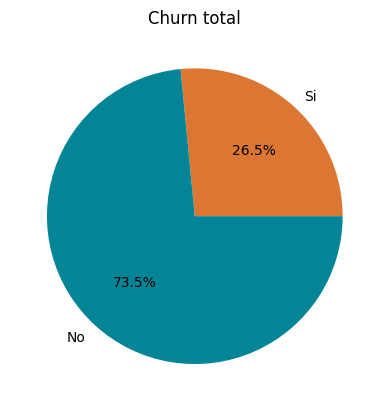

In [224]:
import matplotlib.pyplot as plt
churnVector=[conteo_Yes,conteo_No]
labels=['Si','No']
colors=['#dc7633','#038597']
plt.pie(churnVector, labels=labels, colors=colors, autopct="%0.1f%%")
plt.title("Churn total")
plt.show()

In [225]:
conteo_male = datos['genero'].value_counts()['Hombres']
print(f'clientes masculinos: {conteo_male}')
conteo_female = datos['genero'].value_counts()['Mujeres']
print(f'clientes femeninos: {conteo_female}')

clientes masculinos: 3555
clientes femeninos: 3488


/tmp/ipython-input-226-864539135.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos, x='genero',palette=['red','blue'])


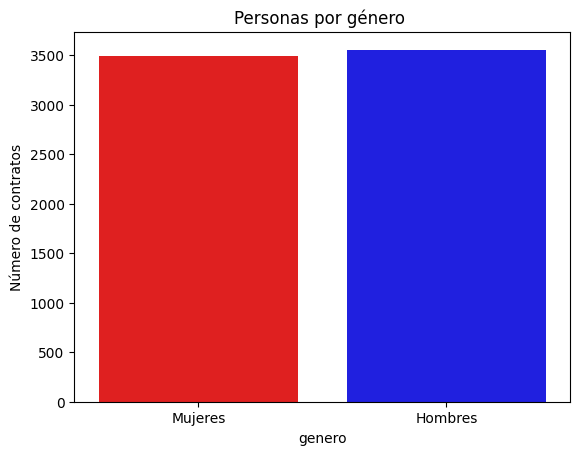

In [226]:
sns.countplot(data=datos, x='genero',palette=['red','blue'])
#for i, valor in enumerate(datos.genero.value_counts()):
#    plt.text(i, valor+.01 , f"{valor:,.2f}", ha='center', va='bottom', fontsize=11) #dejamos 2 decimales con .2f
plt.title("Personas por género ")
plt.ylabel("Número de contratos")
plt.show()

#sns.barplot(data=df_day, x="day", y="propinas_porcentaje")

In [227]:
Datos1=datos.groupby(['Churn','genero']).size().reset_index(name='count')
Datos1

,Churn,genero,count
0,No,Hombres,2625
1,No,Mujeres,2549
2,Si,Hombres,930
3,Si,Mujeres,939


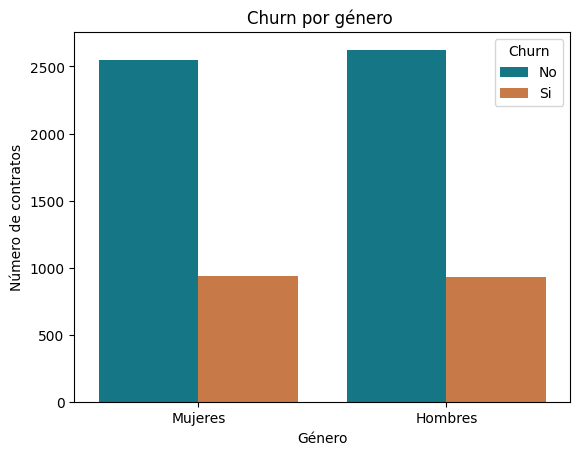

In [228]:
#hacemos la gráfica por género
sns.countplot(data=datos, x='genero',hue='Churn', palette=['#038597','#dc7633'] )
#for i, valor in enumerate(datos.Churn.value_counts()):
#    plt.text(i, valor+.01 , f"{valor:,.2f}", ha='center', va='bottom', fontsize=11) #dejamos 2 decimales con .2f
plt.title("Churn por género ")
plt.ylabel("Número de contratos")
plt.xlabel("Género")
plt.show()
# El género no es un factor, ambas barras son similares

clientes menores a 65: 5901
clientes mayores a 65: 1142


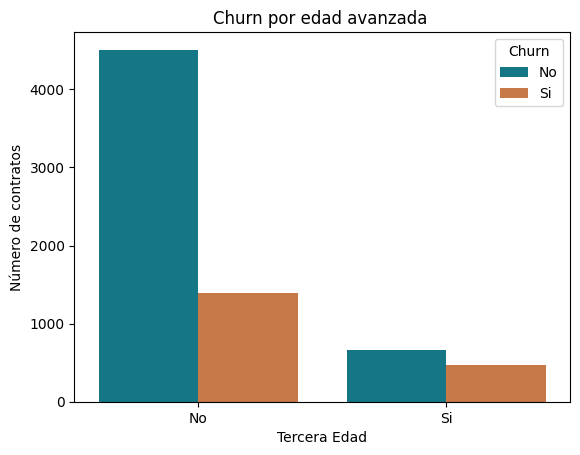

In [229]:
#ahora determinamos si la edad influye, graficando los Tercera_edad (mayores de 65 años)
conteo_noSenior = datos['Tercera_edad'].value_counts()['No']
print(f'clientes menores a 65: {conteo_noSenior}')
conteo_Senior = datos['Tercera_edad'].value_counts()['Si']
print(f'clientes mayores a 65: {conteo_Senior}')

sns.countplot(data=datos, x='Tercera_edad',hue='Churn',palette=['#038597','#dc7633'] )
plt.title("Churn por edad avanzada ")
plt.ylabel("Número de contratos")
plt.xlabel("Tercera Edad")
plt.show()
# Muchos de quienes se quedan son menores a 65, pero también de quienes abandonan son menores

In [230]:
Datos1=datos.groupby(['Churn','Tercera_edad']).size().reset_index(name='count')
Datos1

,Churn,Tercera_edad,count
0,No,No,4508
1,No,Si,666
2,Si,No,1393
3,Si,Si,476


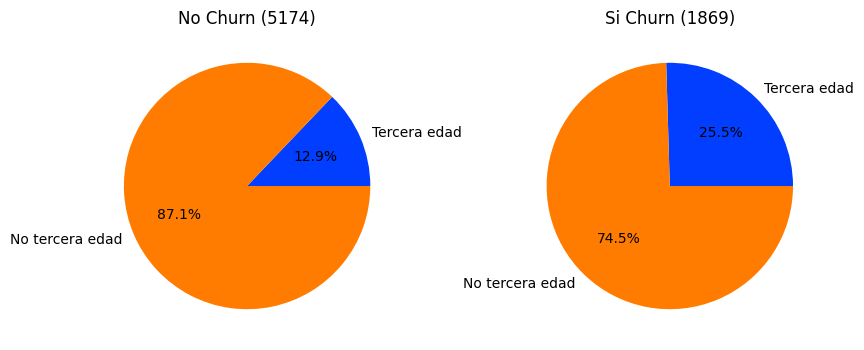

In [231]:
#Crear dos gráficas de pastel para comprender el porcentaje que representan los de la tercera edad que se van y quedan
fig,axs = plt.subplots(1,2,figsize=(10,4))

churnNo3er=[666,4508]
churnSi3er=[476,1393]
colors=sns.color_palette("bright")
labels=['Tercera edad','No tercera edad']
axs[0].pie(churnNo3er, labels=labels, colors=colors, autopct="%0.1f%%")
axs[0].set_title("No Churn (5174)")

axs[1].pie(churnSi3er, labels=labels, colors=colors,autopct="%0.1f%%")
axs[1].set_title("Si Churn (1869)")
plt.show()

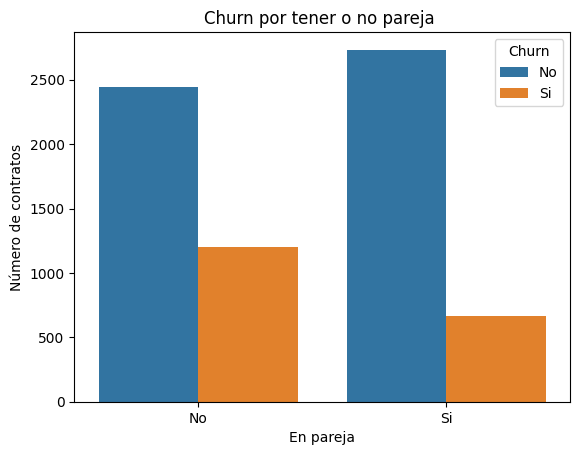

In [232]:
sns.countplot(data=datos, x='casado', hue='Churn', order=['No','Si'])
plt.title("Churn por tener o no pareja ")
plt.ylabel("Número de contratos")
plt.xlabel("En pareja")
plt.show()
# Esta gráfica es más interesante, quienes tienen pareja tienden a quedarse, de los que se van, se van más los que no tienen pareja

In [233]:
#Determinamos si tener pareja influye
conteo_sinPareja = datos['casado'].value_counts()['No']
print(f'clientes sin pareja: {conteo_sinPareja}')
conteo_conPareja = datos['casado'].value_counts()['Si']
print(f'clientes con pareja: {conteo_conPareja}')
datos1=datos.groupby(['Churn','casado']).size().reset_index(name='count')
datos1

clientes sin pareja: 3641
clientes con pareja: 3402


,Churn,casado,count
0,No,No,2441
1,No,Si,2733
2,Si,No,1200
3,Si,Si,669


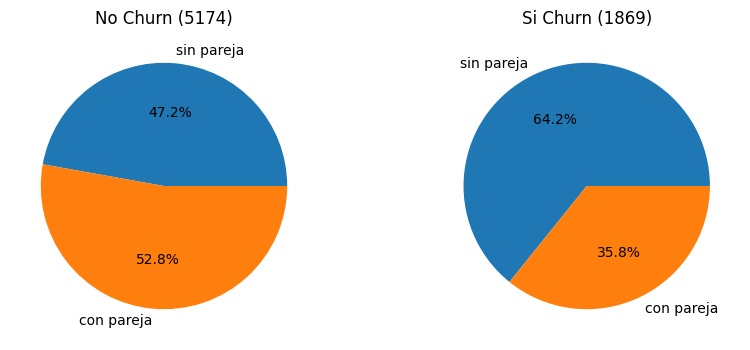

In [234]:
fig,axs = plt.subplots(1,2,figsize=(10,4))

churnNo_pareja=[2441,2733]
churnSi_pareja=[1200,669]
labels=['sin pareja','con pareja']
axs[0].pie(churnNo_pareja, labels=labels, autopct="%0.1f%%")
axs[0].set_title("No Churn (5174)")

axs[1].pie(churnSi_pareja, labels=labels, autopct="%0.1f%%")
axs[1].set_title("Si Churn (1869)")
plt.show()

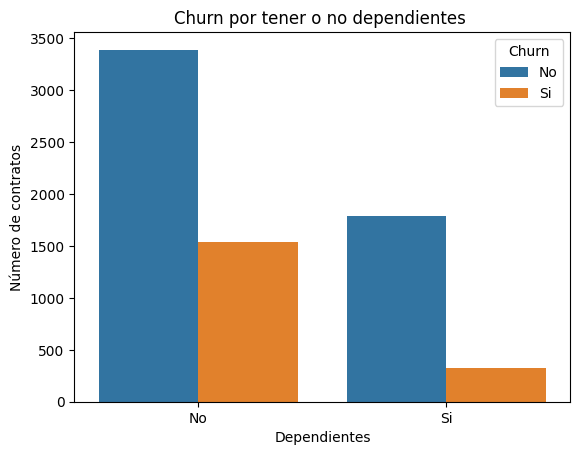

In [235]:
sns.countplot(data=datos, x='Dependientes',hue='Churn', order=['No','Si'] )
#for i, valor in enumerate(datos1["count"]):
#    plt.text(i, valor+.01 , f"{valor:,}", ha='center', va='bottom', fontsize=11) #dejamos 2 decimales con .2f
plt.title("Churn por tener o no dependientes ")
plt.ylabel("Número de contratos")
plt.xlabel("Dependientes")
plt.show()
# Más del doble de nuestros clientes no tienen dependientes, tenemos pocos clientes con dependientes.

In [236]:
#Determinamos si tener dependientes influye
conteo_sinDependientes = datos['Dependientes'].value_counts()[0]
print(f'clientes sin dependientes: {conteo_sinDependientes}')
conteo_conDependientes = datos['Dependientes'].value_counts()[1]
print(f'clientes con dependientes: {conteo_conDependientes}')
datos1=datos.groupby(['Churn','Dependientes']).size().reset_index(name='count')
datos1

clientes sin dependientes: 4933
clientes con dependientes: 2110


/tmp/ipython-input-236-2105301849.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conteo_sinDependientes = datos['Dependientes'].value_counts()[0]
/tmp/ipython-input-236-2105301849.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conteo_conDependientes = datos['Dependientes'].value_counts()[1]


,Churn,Dependientes,count
0,No,No,3390
1,No,Si,1784
2,Si,No,1543
3,Si,Si,326


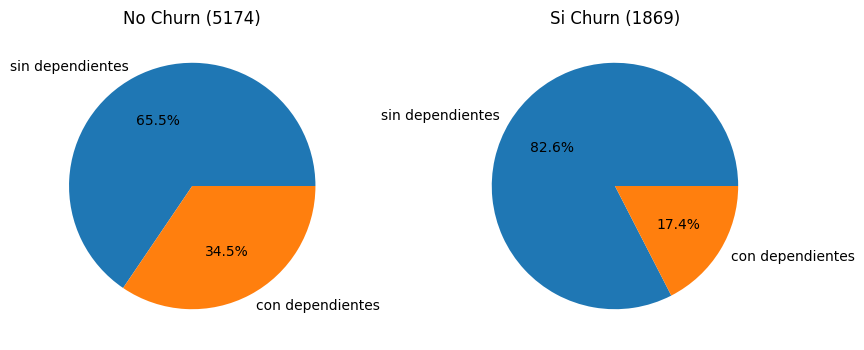

In [237]:
fig,axs = plt.subplots(1,2,figsize=(10,4))

churnNo_dependientes=[3390,1784]
churnSi_dependientes=[1543,326]
labels=['sin dependientes','con dependientes']
axs[0].pie(churnNo_dependientes, labels=labels, autopct="%0.1f%%")
axs[0].set_title("No Churn (5174)")

axs[1].pie(churnSi_dependientes, labels=labels, autopct="%0.1f%%")
axs[1].set_title("Si Churn (1869)")
plt.show()

## Por meses de contrato

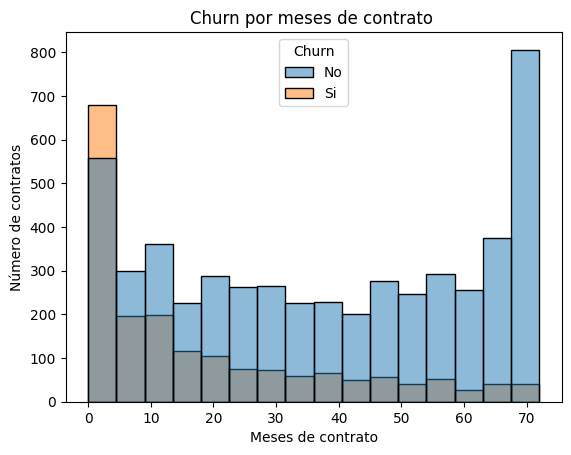

In [238]:
bar_width=0.25

sns.histplot(data=datos, x='meses_de_contrato', hue='Churn')
plt.title("Churn por meses de contrato ")
plt.ylabel("Número de contratos")
plt.xlabel("Meses de contrato")
plt.show()
# Muchos clientes que se van tienen contratos cortos

clientes sin teléfono: 682
clientes con teléfono: 6361


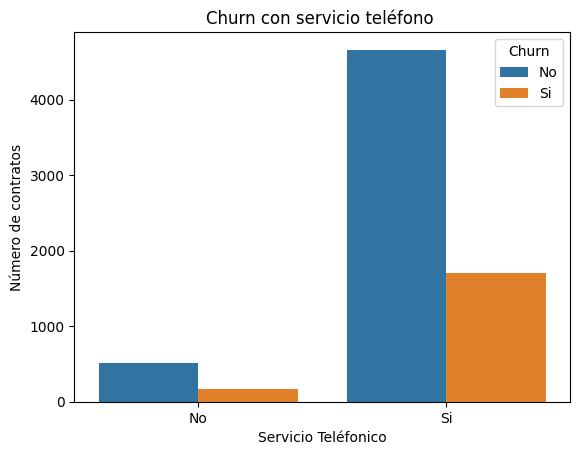

In [239]:
#Determinamos si tiene servicio teléfonico
conteo_sinTelefono = datos['servicio_telefonico'].value_counts()['No']
print(f'clientes sin teléfono: {conteo_sinTelefono}')
conteo_conTelefono = datos['servicio_telefonico'].value_counts()['Si']
print(f'clientes con teléfono: {conteo_conTelefono}')

sns.countplot(data=datos, x='servicio_telefonico', order=['No','Si'], hue='Churn' )
plt.title("Churn con servicio teléfono ")
plt.ylabel("Número de contratos")
plt.xlabel("Servicio Teléfonico")
plt.show()
# Una gran cantidad de clientes tienen teléfono y no parece influir en la decisión de dejar la empresa o no

In [240]:
datos1=datos.groupby(['Churn','servicio_telefonico']).size().reset_index(name='count')
datos1

,Churn,servicio_telefonico,count
0,No,No,512
1,No,Si,4662
2,Si,No,170
3,Si,Si,1699


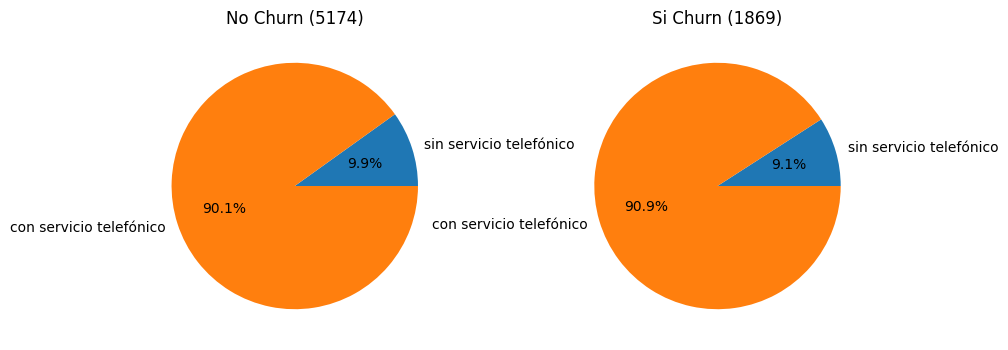

In [241]:

fig,axs = plt.subplots(1,2,figsize=(10,4))

churnNo_Servicio_telefonico=[512,4662]
churnSi_Servicio_telefonico=[170,1699]
labels=['sin servicio telefónico','con servicio telefónico']
axs[0].pie(churnNo_Servicio_telefonico, labels=labels, autopct="%0.1f%%")
axs[0].set_title("No Churn (5174)")

axs[1].pie(churnSi_Servicio_telefonico, labels=labels, autopct="%0.1f%%")
axs[1].set_title("Si Churn (1869)")
plt.show()

clientes sin lineas adicionales: 3390
clientes con líneas adicionales: 2971
clientes sin teléfono: 682


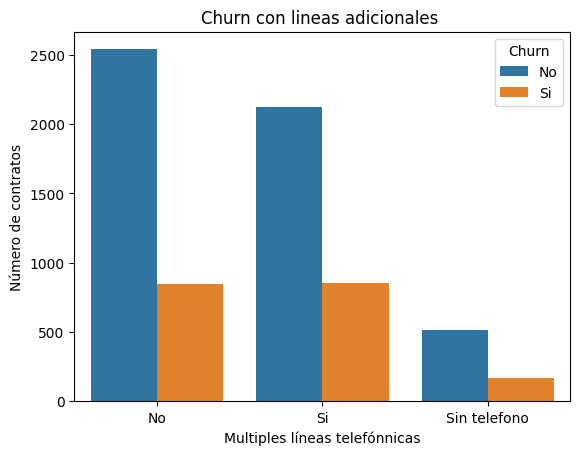

In [242]:
#Determinamos si tienen multiples lineas (aquí lo hicimos simple, pero podemos eliminar a lo que ya sabemos que no tiene teléfono)
conteo_sinLineasAdicionales = datos['multiples_lineas_telefonicas'].value_counts()['No']
print(f'clientes sin lineas adicionales: {conteo_sinLineasAdicionales}')
conteo_conLineas = datos['multiples_lineas_telefonicas'].value_counts()['Si']
print(f'clientes con líneas adicionales: {conteo_conLineas}')
conteo_conLineas = datos['multiples_lineas_telefonicas'].value_counts()['Sin telefono']
print(f'clientes sin teléfono: {conteo_conLineas}')

sns.countplot(data=datos, x='multiples_lineas_telefonicas',hue='Churn' )
plt.title("Churn con lineas adicionales ")
plt.ylabel("Número de contratos")
plt.xlabel("Multiples líneas telefónnicas")
plt.show()
# Muchos de nuestros clientes no tienen teléfono o tienen sólo una línea.

In [243]:
datos1=datos.groupby(['Churn','multiples_lineas_telefonicas']).size().reset_index(name='count')
datos1

,Churn,multiples_lineas_telefonicas,count
0,No,No,2541
1,No,Si,2121
2,No,Sin telefono,512
3,Si,No,849
4,Si,Si,850
5,Si,Sin telefono,170


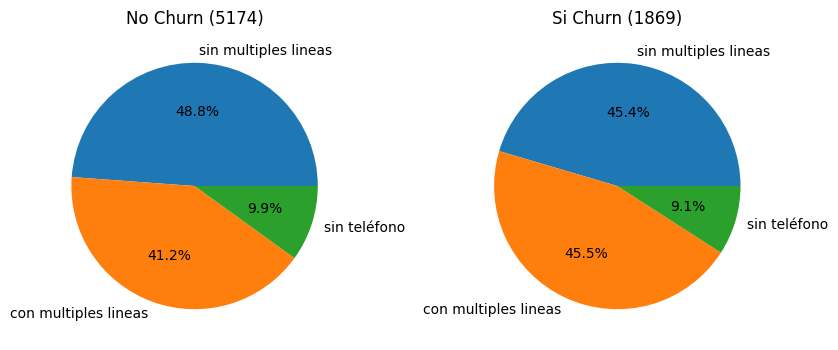

In [244]:
fig,axs = plt.subplots(1,2,figsize=(10,4))

churnNo_multiples_lineas=[2514,2121,512]
churnSi_multiples_lineas=[849,850,170]
labels=['sin multiples lineas','con multiples lineas', 'sin teléfono']
axs[0].pie(churnNo_multiples_lineas, labels=labels, autopct="%0.1f%%")
axs[0].set_title("No Churn (5174)")

axs[1].pie(churnSi_multiples_lineas, labels=labels, autopct="%0.1f%%")
axs[1].set_title("Si Churn (1869)")
plt.show()

clientes DSL: 2421
clientes con Fibra óptica: 3096
clientes Sin servicio de internet: 1526


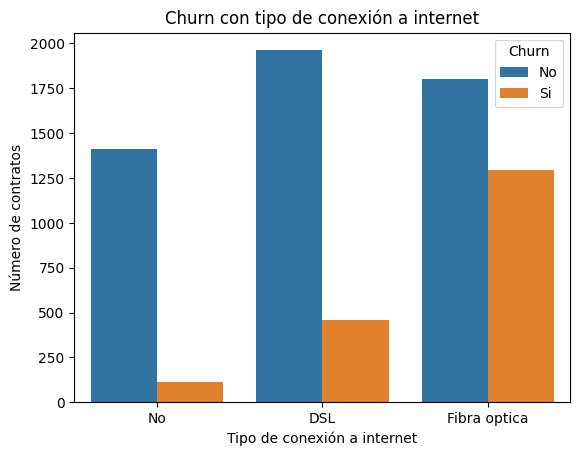

In [245]:
#Determinamos qué tipo de conexión a internet tienen
conteo_DSL = datos['servicio_de_internet'].value_counts()['DSL']
print(f'clientes DSL: {conteo_DSL}')
conteo_Fibra = datos['servicio_de_internet'].value_counts()['Fibra optica']
print(f'clientes con Fibra óptica: {conteo_Fibra}')
conteo_SinServicio = datos['servicio_de_internet'].value_counts()['No']  ####### REVISAR
print(f'clientes Sin servicio de internet: {conteo_SinServicio}')

sns.countplot(data=datos, x='servicio_de_internet',hue='Churn', order=['No','DSL','Fibra optica'])
plt.title("Churn con tipo de conexión a internet")
plt.ylabel("Número de contratos")
plt.xlabel("Tipo de conexión a internet")
plt.show()
# Aquí hay un hallazgo, de lo clientes que nos dejan, la mayoría tiene fibra óptica

In [246]:
datos1=datos.groupby(['Churn','servicio_de_internet']).size().reset_index(name='count')
datos1

,Churn,servicio_de_internet,count
0,No,DSL,1962
1,No,Fibra optica,1799
2,No,No,1413
3,Si,DSL,459
4,Si,Fibra optica,1297
5,Si,No,113


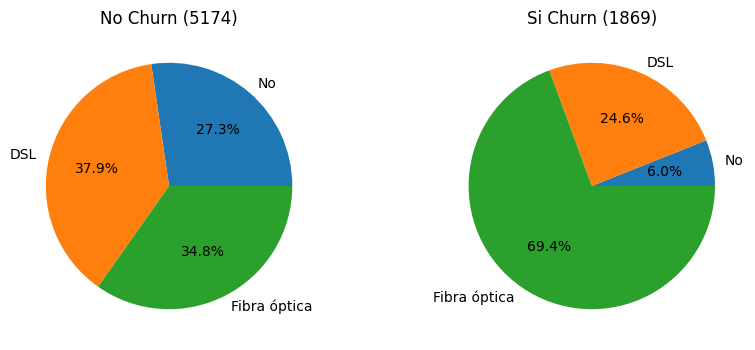

In [247]:
fig,axs = plt.subplots(1,2,figsize=(10,4))

churnNo_servicio_de_internet=[1413,1962,1799]
churnSi_servicio_de_internet=[113,459,1297]
labels=['No','DSL', 'Fibra óptica']
axs[0].pie(churnNo_servicio_de_internet, labels=labels, autopct="%0.1f%%")
axs[0].set_title("No Churn (5174)")

axs[1].pie(churnSi_servicio_de_internet, labels=labels, autopct="%0.1f%%")
axs[1].set_title("Si Churn (1869)")
plt.show()

#Seguridad online

clientes sin seguridad online: 3498
clientes con seguridad online: 2019
clientes Sin servicio de internet: 1526


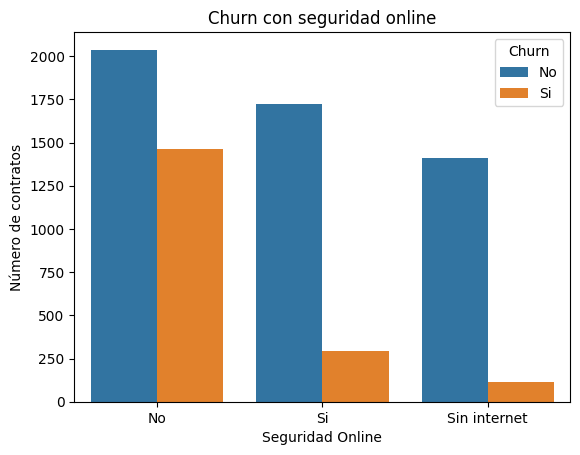

In [248]:
#Seguridad online
conteo_sinSeguridad = datos['seguridad_online'].value_counts()['No']
print(f'clientes sin seguridad online: {conteo_sinSeguridad}')
conteo_conSeguridad = datos['seguridad_online'].value_counts()['Si']
print(f'clientes con seguridad online: {conteo_conSeguridad}')
#conteo_SinServicio = datos['seguridad_online'].value_counts()['Sin_internet']
print(f'clientes Sin servicio de internet: {conteo_SinServicio}')

sns.countplot(data=datos, x='seguridad_online',hue= 'Churn' )
plt.title("Churn con seguridad online")
plt.ylabel("Número de contratos")
plt.xlabel("Seguridad Online")
plt.show()
# hallazgo, de lo clientes que nos dejan, varios no tienen seguridad online

In [249]:
datos1=datos.groupby(['Churn','seguridad_online']).size().reset_index(name='count')
datos1

,Churn,seguridad_online,count
0,No,No,2037
1,No,Si,1724
2,No,Sin internet,1413
3,Si,No,1461
4,Si,Si,295
5,Si,Sin internet,113


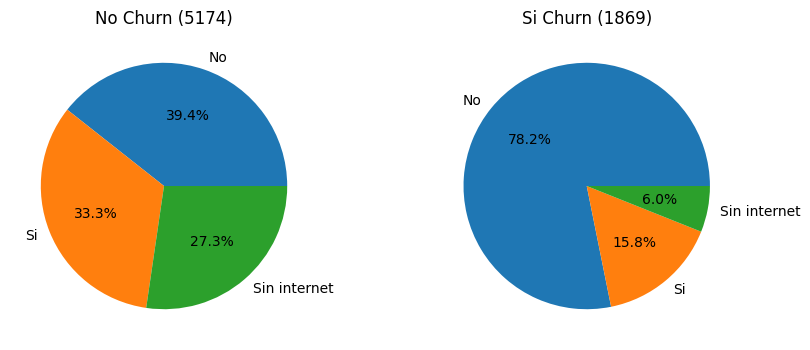

In [250]:
fig,axs = plt.subplots(1,2,figsize=(10,4))

churnNo_seguridad_online=[2037,1724,1413]
churnSi_seguridad_online=[1461,295,113]
labels=['No','Si', 'Sin internet']
axs[0].pie(churnNo_seguridad_online, labels=labels, autopct="%0.1f%%")
axs[0].set_title("No Churn (5174)")

axs[1].pie(churnSi_seguridad_online, labels=labels, autopct="%0.1f%%")
axs[1].set_title("Si Churn (1869)")
plt.show()

clientes sin respaldo online: 3088
clientes con respaldo online: 2429
clientes Sin servicio de internet: 1526


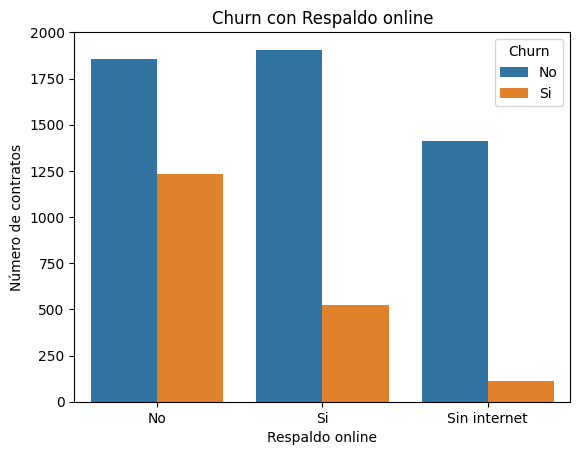

In [251]:
#Repaldo online
conteo_sinRespaldo = datos['respaldo_online'].value_counts()['No']
print(f'clientes sin respaldo online: {conteo_sinRespaldo}')
conteo_conRespaldo = datos['respaldo_online'].value_counts()['Si']
print(f'clientes con respaldo online: {conteo_conRespaldo}')
conteo_SinServicio = datos['respaldo_online'].value_counts()['Sin internet']
print(f'clientes Sin servicio de internet: {conteo_SinServicio}')

sns.countplot(data=datos, x='respaldo_online', order=['No','Si','Sin internet'],hue='Churn')  ##REVISAR
plt.title("Churn con Respaldo online")
plt.ylabel("Número de contratos")
plt.xlabel("Respaldo online")
plt.show()
# hallazgo, de lo clientes que nos dejan, varios no tienen respaldo online

In [252]:
datos1=datos.groupby(['Churn','respaldo_online']).size().reset_index(name='count')
datos1

,Churn,respaldo_online,count
0,No,No,1855
1,No,Si,1906
2,No,Sin internet,1413
3,Si,No,1233
4,Si,Si,523
5,Si,Sin internet,113


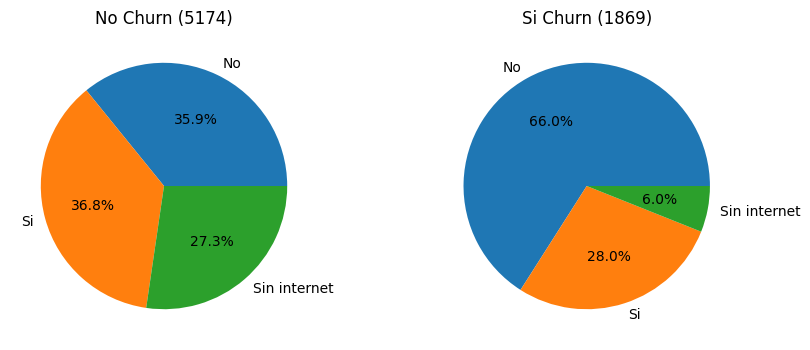

In [253]:
fig,axs = plt.subplots(1,2,figsize=(10,4))

churnNo_respaldo_online=[1855,1906,1413]
churnSi_respaldo_online=[1233,523,113]
labels=['No','Si', 'Sin internet']
axs[0].pie(churnNo_respaldo_online, labels=labels, autopct="%0.1f%%")
axs[0].set_title("No Churn (5174)")

axs[1].pie(churnSi_respaldo_online, labels=labels, autopct="%0.1f%%")
axs[1].set_title("Si Churn (1869)")
plt.show()

clientes sin seguridad online: 3095
clientes con seguridad online: 2422
clientes Sin servicio de internet: 1526


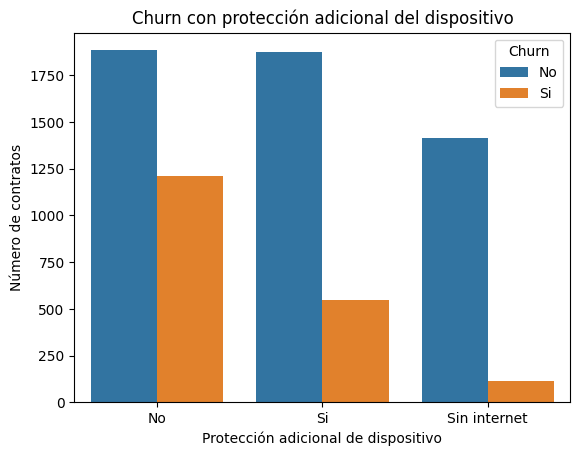

In [254]:
#Protección adicional del dispositivo
conteo_sinProteccion = datos['Proteccion_de_dispositivo'].value_counts()['No']
print(f'clientes sin seguridad online: {conteo_sinProteccion}')
conteo_conProteccion = datos['Proteccion_de_dispositivo'].value_counts()['Si']
print(f'clientes con seguridad online: {conteo_conProteccion}')
conteo_SinServicio = datos['Proteccion_de_dispositivo'].value_counts()['Sin internet']
print(f'clientes Sin servicio de internet: {conteo_SinServicio}')

sns.countplot(data=datos, x='Proteccion_de_dispositivo',hue='Churn' )
plt.title("Churn con protección adicional del dispositivo")
plt.ylabel("Número de contratos")
plt.xlabel("Protección adicional de dispositivo")
plt.show()
# hallazgo, de lo clientes que nos dejan, varios no tienen protección adicional del dispositivo

In [255]:
datos1=datos.groupby(['Churn','Proteccion_de_dispositivo']).size().reset_index(name='count')
datos1

,Churn,Proteccion_de_dispositivo,count
0,No,No,1884
1,No,Si,1877
2,No,Sin internet,1413
3,Si,No,1211
4,Si,Si,545
5,Si,Sin internet,113


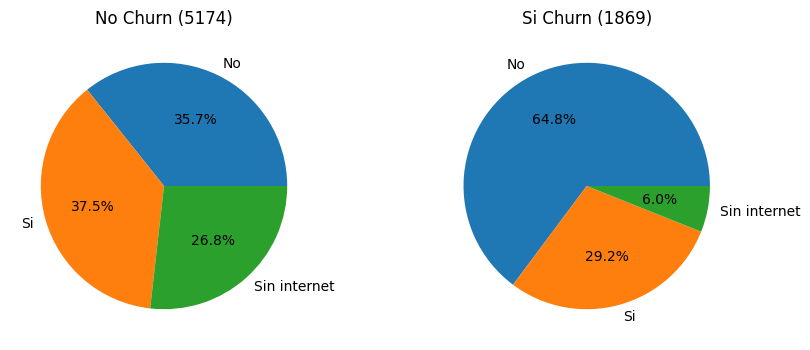

In [256]:
fig,axs = plt.subplots(1,2,figsize=(10,4))

churnNo_respaldo_online=[1884,1977,1413]
churnSi_respaldo_online=[1211,545,113]
labels=['No','Si', 'Sin internet']
axs[0].pie(churnNo_respaldo_online, labels=labels, autopct="%0.1f%%")
axs[0].set_title("No Churn (5174)")

axs[1].pie(churnSi_respaldo_online, labels=labels, autopct="%0.1f%%")
axs[1].set_title("Si Churn (1869)")
plt.show()

#soporte_tecnico_rapido

clientes sin soporte técnico rápido: 3473
clientes con soporte técnico rápido: 2044
clientes Sin servicio de internet: 1526


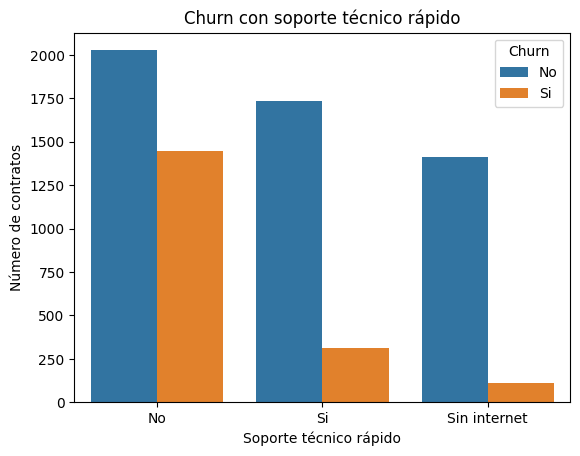

In [257]:
#Soporte técnico rápido
conteo_sinSoporte = datos['Soporte_tecnico_rapido'].value_counts()['No']
print(f'clientes sin soporte técnico rápido: {conteo_sinSoporte}')
conteo_conSoporte = datos['Soporte_tecnico_rapido'].value_counts()['Si']
print(f'clientes con soporte técnico rápido: {conteo_conSoporte}')
conteo_SinServicio = datos['Soporte_tecnico_rapido'].value_counts()['Sin internet']
print(f'clientes Sin servicio de internet: {conteo_SinServicio}')

sns.countplot(data=datos, x='Soporte_tecnico_rapido', order=['No','Si','Sin internet'], hue='Churn')
plt.title("Churn con soporte técnico rápido")
plt.ylabel("Número de contratos")
plt.xlabel("Soporte técnico rápido")
plt.show()
# hallazgo, de lo clientes que nos dejan, tienen servicio técnico lento

In [258]:
datos1=datos.groupby(['Churn','Soporte_tecnico_rapido']).size().reset_index(name='count')
datos1

,Churn,Soporte_tecnico_rapido,count
0,No,No,2027
1,No,Si,1734
2,No,Sin internet,1413
3,Si,No,1446
4,Si,Si,310
5,Si,Sin internet,113


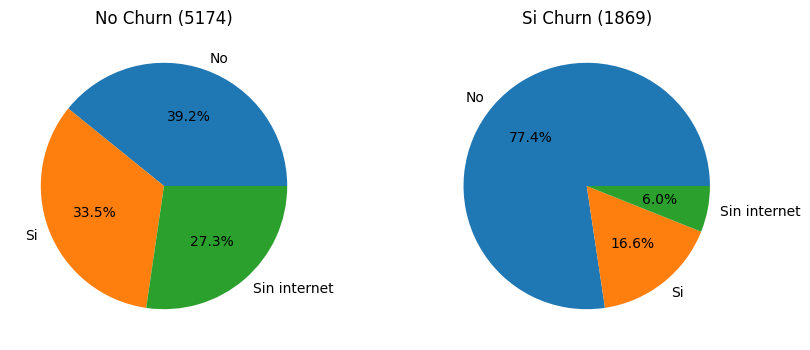

In [283]:
fig,axs = plt.subplots(1,2,figsize=(10,4))

churnNo_soporte_tecnico_rapido=[2027,1734,1413]
churnSi_soporte_tecnico_rapido=[1446,310,113]
labels=['No','Si', 'Sin internet']
axs[0].pie(churnNo_soporte_tecnico_rapido, labels=labels, autopct="%0.1f%%")
axs[0].set_title("No Churn (5174)")

axs[1].pie(churnSi_soporte_tecnico_rapido, labels=labels, autopct="%0.1f%%")
axs[1].set_title("Si Churn (1869)")
plt.show()

clientes sin seguridad online: 2810
clientes con seguridad online: 2707
clientes Sin servicio de internet: 1526


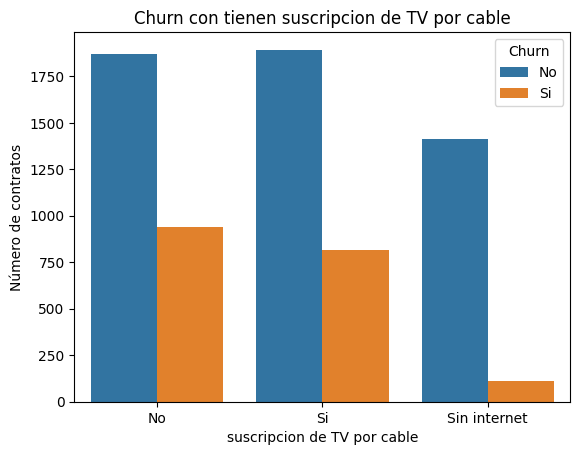

In [260]:
#Tienen suscripcion de TV por cable
conteo_sinTV = datos['Streaming_TV'].value_counts()['No']
print(f'clientes sin seguridad online: {conteo_sinTV}')
conteo_conTV = datos['Streaming_TV'].value_counts()['Si']
print(f'clientes con seguridad online: {conteo_conTV}')
conteo_SinServicio = datos['Streaming_TV'].value_counts()['Sin internet']
print(f'clientes Sin servicio de internet: {conteo_SinServicio}')

sns.countplot(data=datos, x='Streaming_TV', order=['No','Si','Sin internet'], hue='Churn')
plt.title("Churn con tienen suscripcion de TV por cable")
plt.ylabel("Número de contratos")
plt.xlabel("suscripcion de TV por cable")
plt.show()
# No analizo aún esta gráfica

In [261]:
datos1=datos.groupby(['Churn','Streaming_TV']).size().reset_index(name='count')
datos1

,Churn,Streaming_TV,count
0,No,No,1868
1,No,Si,1893
2,No,Sin internet,1413
3,Si,No,942
4,Si,Si,814
5,Si,Sin internet,113


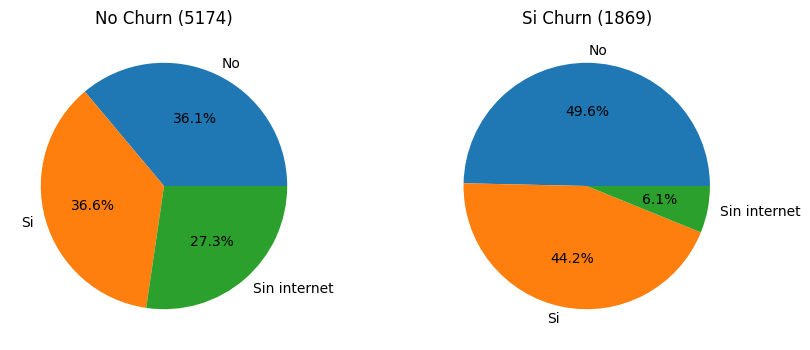

In [262]:
fig,axs = plt.subplots(1,2,figsize=(10,4))

churnNo_TV=[1868,1893,1413]
churnSi_TV=[914,814,113]
labels=['No','Si', 'Sin internet']
axs[0].pie(churnNo_TV, labels=labels, autopct="%0.1f%%")
axs[0].set_title("No Churn (5174)")

axs[1].pie(churnSi_TV, labels=labels, autopct="%0.1f%%")
axs[1].set_title("Si Churn (1869)")
plt.show()

clientes sin seguridad online: 2785
clientes con seguridad online: 2732
clientes Sin servicio de internet: 1526


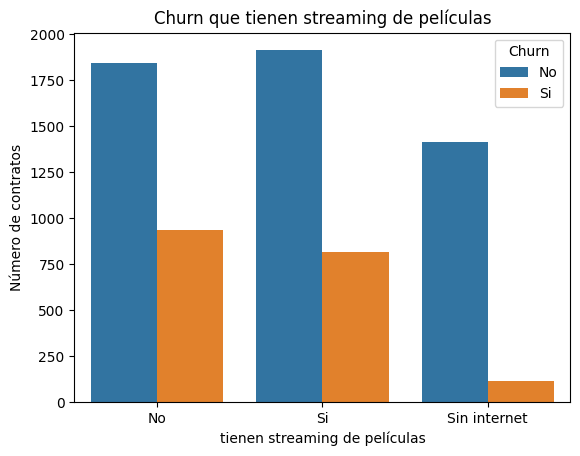

In [263]:
#Tienen streaming de películas
conteo_sinPeliculas = datos['Streaming_Peliculas'].value_counts()['No']
print(f'clientes sin seguridad online: {conteo_sinPeliculas}')
conteo_conPeliculas = datos['Streaming_Peliculas'].value_counts()['Si']
print(f'clientes con seguridad online: {conteo_conPeliculas}')
conteo_SinServicio = datos['Streaming_Peliculas'].value_counts()['Sin internet']
print(f'clientes Sin servicio de internet: {conteo_SinServicio}')

sns.countplot(data=datos, x='Streaming_Peliculas', order=['No','Si','Sin internet'], hue='Churn')
plt.title("Churn que tienen streaming de películas")
plt.ylabel("Número de contratos")
plt.xlabel("tienen streaming de películas")
plt.show()
# No analizo aún esta gráfica

In [264]:
datos1=datos.groupby(['Churn','Streaming_Peliculas']).size().reset_index(name='count')
datos1

,Churn,Streaming_Peliculas,count
0,No,No,1847
1,No,Si,1914
2,No,Sin internet,1413
3,Si,No,938
4,Si,Si,818
5,Si,Sin internet,113


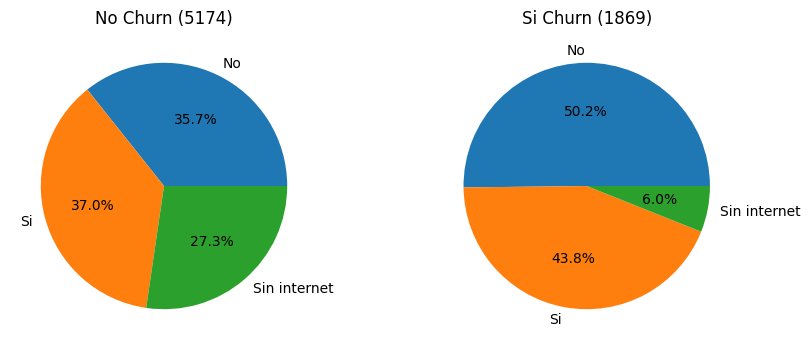

In [265]:
fig,axs = plt.subplots(1,2,figsize=(10,4))

churnNo_Peliculas=[1847,1914,1413]
churnSi_Peliculas=[938,818,113]
labels=['No','Si', 'Sin internet']
axs[0].pie(churnNo_Peliculas, labels=labels, autopct="%0.1f%%")
axs[0].set_title("No Churn (5174)")

axs[1].pie(churnSi_Peliculas, labels=labels, autopct="%0.1f%%")
axs[1].set_title("Si Churn (1869)")
plt.show()

clientes con contrato mensual: 3875
clientes con contrato anual: 1473
clientes con contrato bianual: 1695


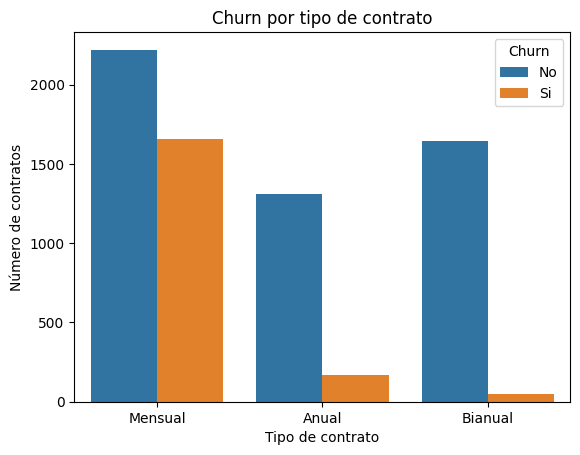

In [266]:
#Clientes por contrato
conteo_mensual = datos['Tipo_de_contrato'].value_counts()['Mensual']
print(f'clientes con contrato mensual: {conteo_mensual}')
conteo_Anual = datos['Tipo_de_contrato'].value_counts()['Anual']
print(f'clientes con contrato anual: {conteo_Anual}')
conteo_Bianual = datos['Tipo_de_contrato'].value_counts()['Bianual']
print(f'clientes con contrato bianual: {conteo_Bianual}')

sns.countplot(data=datos, x='Tipo_de_contrato',order=['Mensual','Anual','Bianual'],hue='Churn' )
plt.title("Churn por tipo de contrato")
plt.ylabel("Número de contratos")
plt.xlabel("Tipo de contrato")
plt.show()
# Hallazgo: Aunque muchos clientes con contrato mensual se quedan, también son los que más se van

In [267]:
datos1=datos.groupby(['Churn','Tipo_de_contrato']).size().reset_index(name='count')
datos1

,Churn,Tipo_de_contrato,count
0,No,Anual,1307
1,No,Bianual,1647
2,No,Mensual,2220
3,Si,Anual,166
4,Si,Bianual,48
5,Si,Mensual,1655


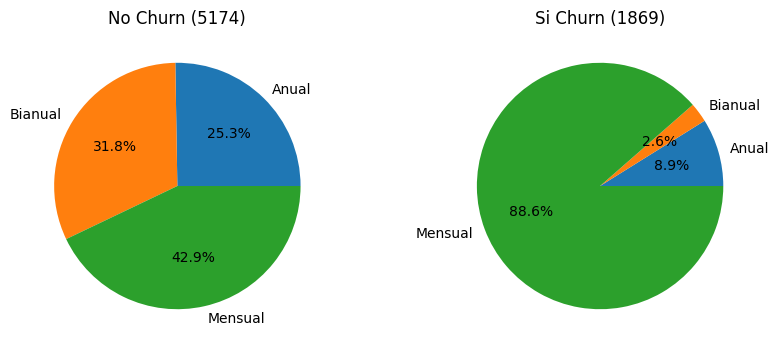

In [268]:
fig,axs = plt.subplots(1,2,figsize=(10,4))

churnNo_contrato=[1307,1647,2220]
churnSi_contrato=[166,48,1655]
labels=['Anual','Bianual', 'Mensual']
axs[0].pie(churnNo_contrato, labels=labels, autopct="%0.1f%%")
axs[0].set_title("No Churn (5174)")

axs[1].pie(churnSi_contrato, labels=labels, autopct="%0.1f%%")
axs[1].set_title("Si Churn (1869)")
plt.show()

clientes con factura digital: 4171
clientes con factura impresa: 2872


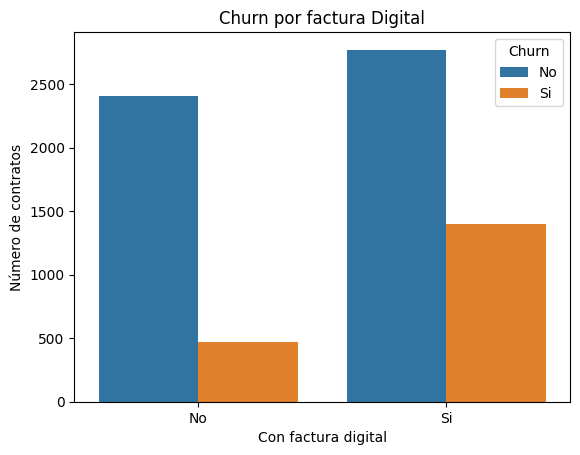

In [269]:
#Clientes por contrato
conteo_facturaDigital = datos['Factura_electronica'].value_counts()['Si']
print(f'clientes con factura digital: {conteo_facturaDigital}')
conteo_facturaImpresa = datos['Factura_electronica'].value_counts()['No']
print(f'clientes con factura impresa: {conteo_facturaImpresa}')

sns.countplot(data=datos, x='Factura_electronica',order=['No','Si'],hue='Churn' )
plt.title("Churn por factura Digital")
plt.ylabel("Número de contratos")
plt.xlabel("Con factura digital")
plt.show()
#

In [270]:
datos1=datos.groupby(['Churn','Factura_electronica']).size().reset_index(name='count')
datos1

,Churn,Factura_electronica,count
0,No,No,2403
1,No,Si,2771
2,Si,No,469
3,Si,Si,1400


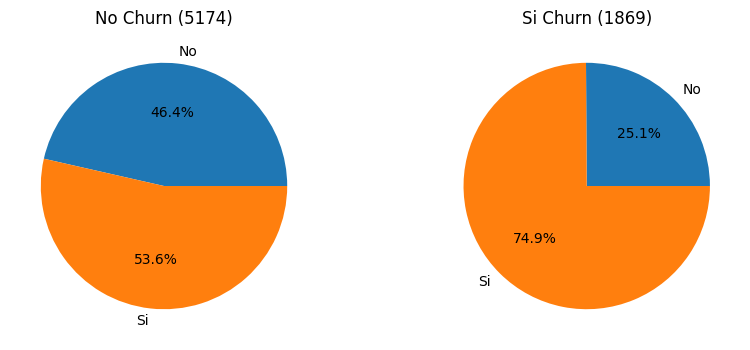

In [271]:
fig,axs = plt.subplots(1,2,figsize=(10,4))

churnNo_facturaE=[2403,2771]
churnSi_facturaE=[469,1400]
labels=['No','Si']
axs[0].pie(churnNo_facturaE, labels=labels, autopct="%0.1f%%")
axs[0].set_title("No Churn (5174)")

axs[1].pie(churnSi_facturaE, labels=labels, autopct="%0.1f%%")
axs[1].set_title("Si Churn (1869)")
plt.show()

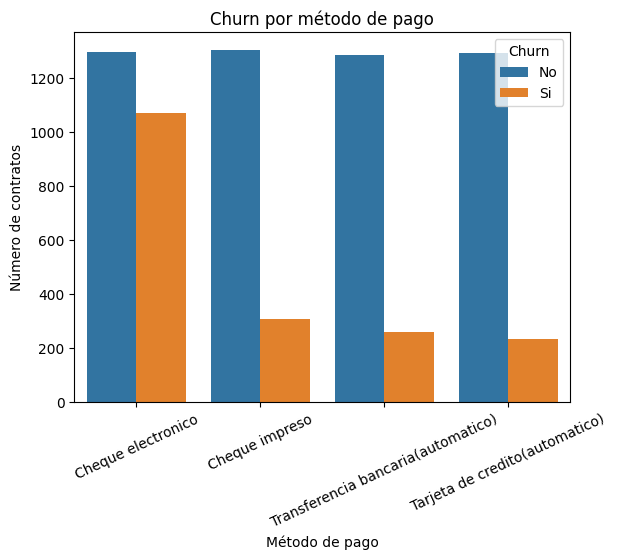

In [272]:

sns.countplot(data=datos, x='Metodo_de_pago', order=['Cheque electronico','Cheque impreso','Transferencia bancaria(automatico)','Tarjeta de credito(automatico)'], hue='Churn' )
plt.title("Churn por método de pago")
plt.ylabel("Número de contratos")
plt.xlabel("Método de pago")
plt.xticks(rotation=25)
figsize=(10,3)
plt.show()
#Hallazgo: los clientes que pagan por cheque electrónico abandonan más

In [273]:
datos1=datos.groupby(['Churn','Metodo_de_pago']).size().reset_index(name='count')
datos1

,Churn,Metodo_de_pago,count
0,No,Cheque electronico,1294
1,No,Cheque impreso,1304
2,No,Tarjeta de credito(automatico),1290
3,No,Transferencia bancaria(automatico),1286
4,Si,Cheque electronico,1071
5,Si,Cheque impreso,308
6,Si,Tarjeta de credito(automatico),232
7,Si,Transferencia bancaria(automatico),258


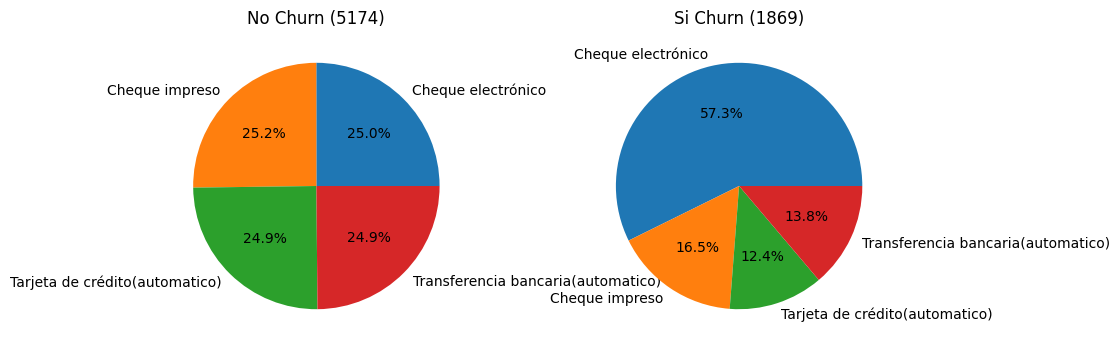

In [274]:
fig,axs = plt.subplots(1,2,figsize=(10,4))

churnNo_pago=[1294,1304,1290,1286]
churnSi_pago=[1071,308,232,258]
labels=['Cheque electrónico','Cheque impreso', 'Tarjeta de crédito(automatico)', 'Transferencia bancaria(automatico)']
axs[0].pie(churnNo_pago, labels=labels, autopct="%0.1f%%")
axs[0].set_title("No Churn (5174)")

axs[1].pie(churnSi_pago, labels=labels, autopct="%0.1f%%")
axs[1].set_title("Si Churn (1869)")
plt.show()

In [275]:
Datos1=datos.groupby(['Churn','Cargos_mensuales']).size().reset_index(name='count')
Datos1

,Churn,Cargos_mensuales,count
0,No,18.25,1
1,No,18.40,1
2,No,18.55,1
3,No,18.70,2
4,No,18.75,1
...,...,...,...
2365,Si,115.65,1
2366,Si,116.20,1
2367,Si,117.45,1
2368,Si,117.80,1


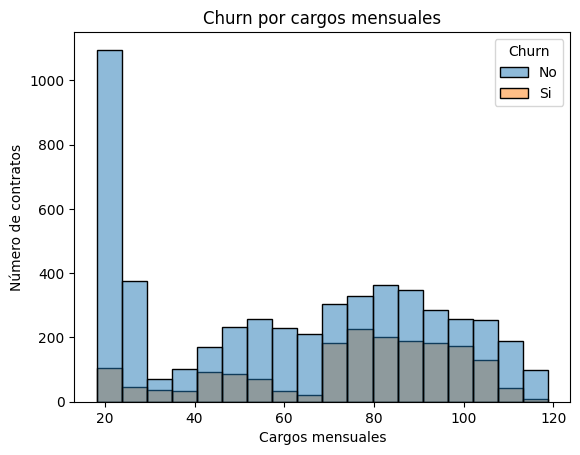

In [276]:
sns.histplot(data=datos,  x='Cargos_mensuales', hue ="Churn")
plt.title("Churn por cargos mensuales")
plt.ylabel("Número de contratos")
plt.xlabel("Cargos mensuales")
plt.show()

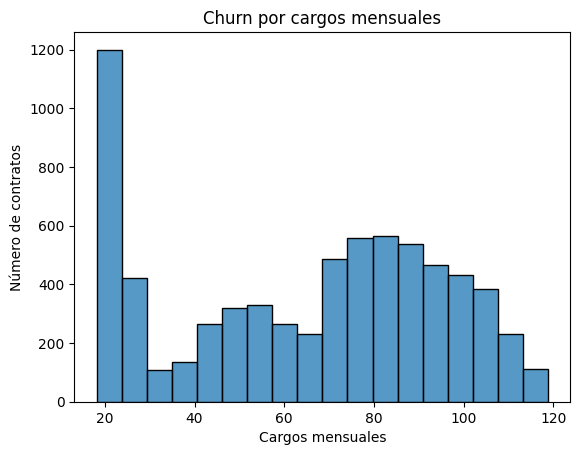

In [277]:

sns.histplot(data=datos, x= "Cargos_mensuales") #'Churn', hue='Cargos_mensuales')
plt.title("Churn por cargos mensuales")
plt.ylabel("Número de contratos")
plt.xlabel("Cargos mensuales")
plt.show()
#parece que podemos segmentar en 0 a 20, 40, 60, 80 y 100

In [278]:
Datos1=datos.groupby(['Churn','Cargos_totales']).size().reset_index(name='count')
Datos1

,Churn,Cargos_totales,count
0,No,0.00,11
1,No,18.80,1
2,No,18.85,1
3,No,18.90,1
4,No,19.00,1
...,...,...,...
6693,Si,7856.00,1
6694,Si,7968.85,1
6695,Si,8109.80,1
6696,Si,8127.60,1


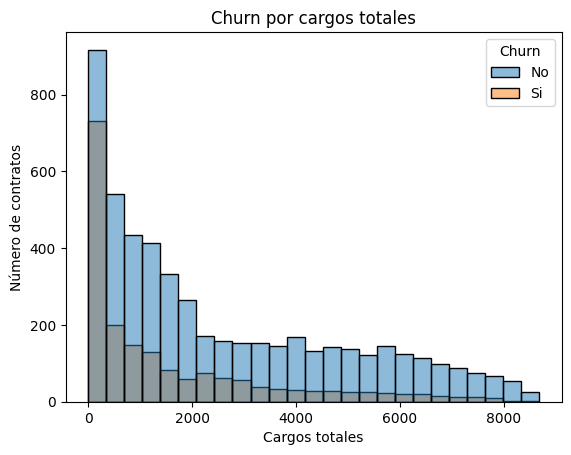

In [279]:
sns.histplot(data=datos, x='Cargos_totales', hue='Churn')
plt.title("Churn por cargos totales")
plt.ylabel("Número de contratos")
plt.xlabel("Cargos totales")
plt.show()

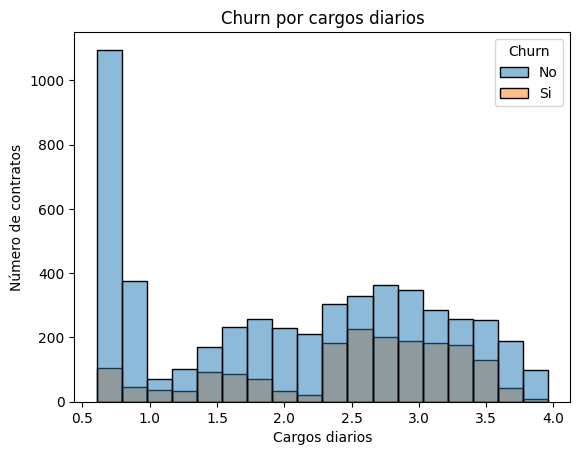

In [282]:
sns.histplot(data=datos, x='cargos_diarios' , hue='Churn')
plt.title("Churn por cargos diarios")
plt.ylabel("Número de contratos")
plt.xlabel("Cargos diarios")
plt.show()

#📄Informe final

En este informe se presenta de forma sintetizada el resultado del análisis efectuado para identificar razones de abandono de clientes (Churn) los churn negativos indican que siguen siendo nuestros clientes y el positivo significa que nos abandonaron.

#Datos que no afectan significativamente el churn:
- El género (hombres y mujeres)
- Una gran cantidad de clientes tienen teléfono y no parece influir en la decisión de dejar la empresa o no.
- No se observan cambios importantes en la decisión por número de líneas telefónicas.



#Datos que si tienen diferenca en el churn:
#Demográficos
- De nuestros clientes actuales, 12.8% son de la tercera edad, de los que nos han dejado 25.5% son de la tercera edad, así que aumenta la probabilidad de dejarnos.
- Quienes tienen pareja se quedan más (clientes actuales con pareja: 52.8%) , se van más si no tienen pareja(64.2%).
- si tienen dependientes tienden a quedarse. 84.6% de los clientes que se van no tienen dependientes.

**Observaciones:** Estos datos sirven para mejorar la segmentación de clientes

#Tipo de contrato y formas de pago
- Los clientes que tienen contratos más cortos se van más.
- **88.6%** de los clientes que nos dejan, manienen un contrato mensual.
- 74.9% de los clientes que nos dejan, reciben factura electrónica.
- 57.3% de los clientes que nos dejan, pagan con cheque electrónico.
**Observaciones:** Las caracteristicas de plazos cortos y facilidades tecnológicas favorecen la salida rápida de clientes, se sugiere aplicar campañas de fidelización

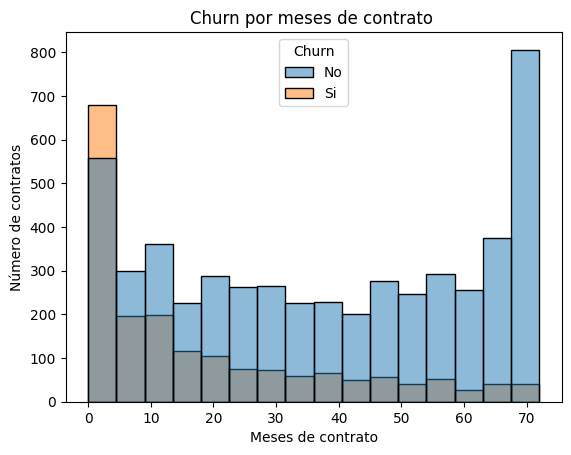

#88.6% de los clientes que nos dejan, manienen un contrato mensual.

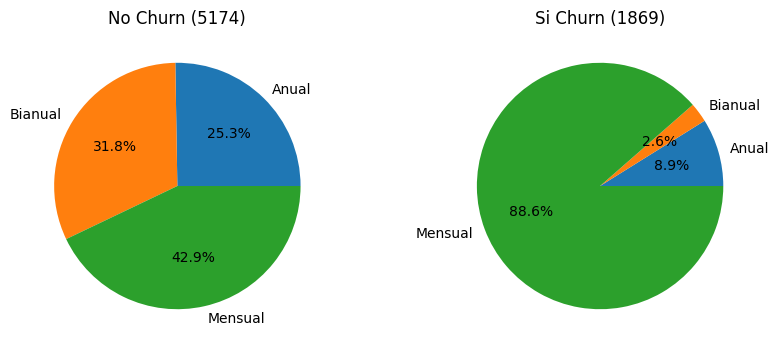

#Situaciones Técnicas
- 69.9% de los clientes que nos dejan, tienen fibra óptica.
- **78.2%** de los clientes que nos dejan, no cuentan con seguridad adicional online.
- 66% de los cientes que nos dejan, no tienen respaldo online.
- 64.8% de los clientes que nos dejan, no tienen protección de dispositivo.
- **77.4%** de los clientes que nos dejan, no tienen soporte técnico rápido.
- 49.6% de los clientes que nos dejan, no tienen TV por stremming.
- 50.2% de los clientes que nos dejan, no tienen Stremming para películas.
**Observaciones:** Atención al área técnica para fidelizar clientes

#78.2% de los clientes que nos dejan, no cuentan con seguridad adicional online.

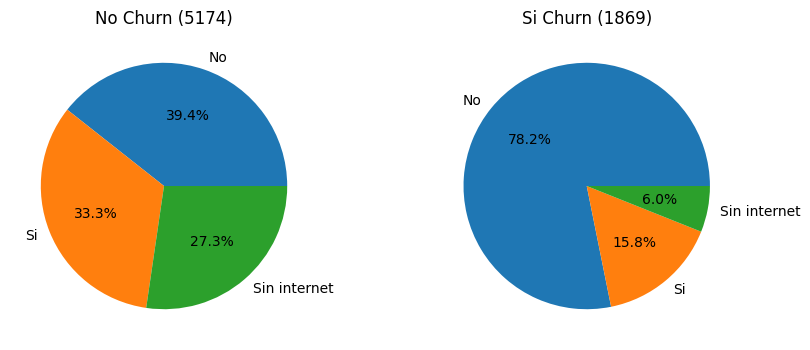

#77.4% de los clientes que nos dejan, no tienen soporte técnico rápido.

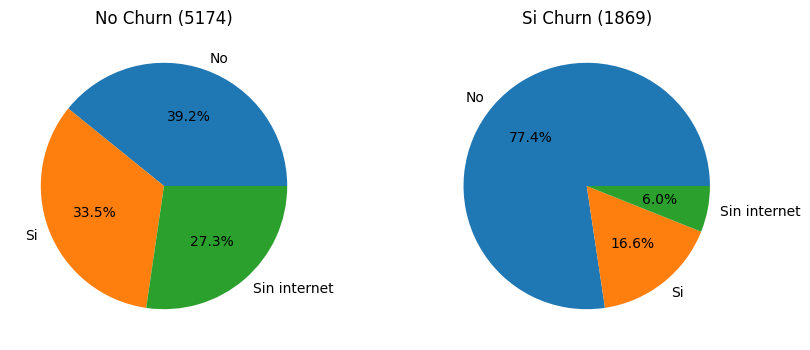